In [1]:
import pandas as pd

power_df = pd.read_csv("file_02.csv")


In [2]:
power_df.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [3]:
power_df.tail()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
4940,305,2020-08-01,Northern,669.47,602.96,26.88,23.41,348.72,351.98
4941,306,2020-08-01,Western,"1,116.00","1,262.10",42.37,36.63,54.67,20.28
4942,307,2020-08-01,Southern,494.66,415.53,61.83,26.28,93.49,77.25
4943,308,2020-08-01,Eastern,482.86,547.03,NaN,NaN,87.22,93.78
4944,309,2020-08-01,NorthEastern,34.42,32.81,NaN,NaN,29.87,29.96


In [4]:
power_df.shape

(4945, 9)

In [5]:
power_df.isnull().sum()

index                                      0
Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

In [6]:
power_df.dtypes

index                                     int64
Date                                     object
Region                                   object
Thermal Generation Actual (in MU)        object
Thermal Generation Estimated (in MU)     object
Nuclear Generation Actual (in MU)       float64
Nuclear Generation Estimated (in MU)    float64
Hydro Generation Actual (in MU)         float64
Hydro Generation Estimated (in MU)      float64
dtype: object

In [7]:
power_df["Thermal Generation Actual (in MU)"] = pd.to_numeric(power_df["Thermal Generation Actual (in MU)"], errors='coerce')
power_df["Thermal Generation Estimated (in MU)"] = pd.to_numeric(power_df["Thermal Generation Estimated (in MU)"], errors='coerce')


In [8]:
power_df.dtypes

index                                     int64
Date                                     object
Region                                   object
Thermal Generation Actual (in MU)       float64
Thermal Generation Estimated (in MU)    float64
Nuclear Generation Actual (in MU)       float64
Nuclear Generation Estimated (in MU)    float64
Hydro Generation Actual (in MU)         float64
Hydro Generation Estimated (in MU)      float64
dtype: object

In [9]:
power_df.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,NaN,NaN,25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [10]:
num_cols = power_df.select_dtypes(include=['float64','int64']).columns
cat_cols = power_df.select_dtypes(include=['object']).columns


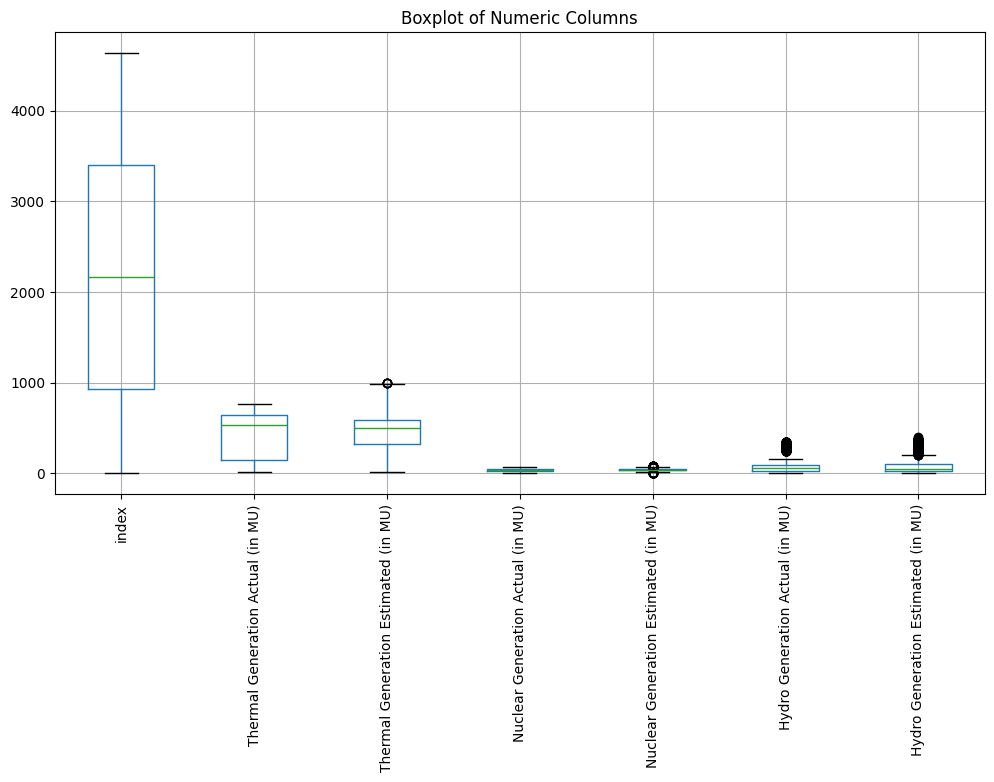

In [11]:
import matplotlib.pyplot as plt

power_df[num_cols].boxplot(figsize=(12,6))  
plt.xticks(rotation=90)                      
plt.title("Boxplot of Numeric Columns")
plt.show()

In [12]:
power_df[num_cols] = power_df[num_cols].fillna(power_df[num_cols].median())

In [13]:
print(f"Number of duplicate rows: {power_df.duplicated().sum()}")

Number of duplicate rows: 0


In [14]:
import numpy as np

Q1 = power_df[num_cols].quantile(0.25)
Q3 = power_df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in num_cols:
    median = power_df[col].median()
    power_df[col] = np.where((power_df[col] < lower_bound[col]) | (power_df[col] > upper_bound[col]),
                       median,
                       power_df[col])

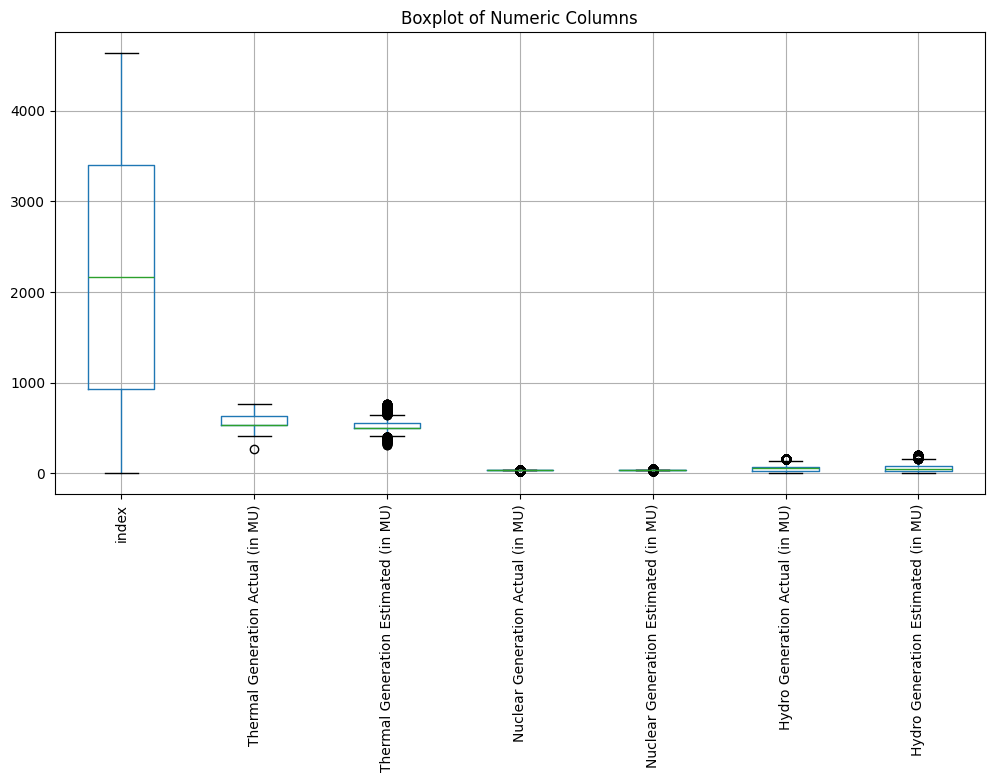

In [17]:

power_df[num_cols].boxplot(figsize=(12,6))   # you can also adjust figure size
plt.xticks(rotation=90)                      # rotate x-axis labels
plt.title("Boxplot of Numeric Columns")
plt.show()

In [18]:
power_df['Date'] = pd.to_datetime(power_df['Date'])  

In [19]:
# Extract time-based features
power_df['Year'] = power_df['Date'].dt.year
power_df['Month'] = power_df['Date'].dt.month
power_df['DayOfWeek'] = power_df['Date'].dt.day

In [20]:
power_df.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Year,Month,DayOfWeek
0,0.0,2017-09-01,Northern,624.23,484.21,30.36,35.57,52.96,50.27,2017,9,1
1,1.0,2017-09-01,Western,530.46,495.45,25.17,34.84,72.00,21.53,2017,9,1
2,2.0,2017-09-01,Southern,576.66,578.55,30.72,34.84,111.57,64.78,2017,9,1
3,3.0,2017-09-01,Eastern,441.02,429.39,30.72,34.84,85.94,69.36,2017,9,1
4,4.0,2017-09-01,NorthEastern,530.46,495.45,30.72,34.84,24.64,21.21,2017,9,1


In [21]:
power_df.drop("Date", axis=1, inplace=True)

In [22]:
power_df.head()

,index,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Year,Month,DayOfWeek
0,0.0,Northern,624.23,484.21,30.36,35.57,52.96,50.27,2017,9,1
1,1.0,Western,530.46,495.45,25.17,34.84,72.00,21.53,2017,9,1
2,2.0,Southern,576.66,578.55,30.72,34.84,111.57,64.78,2017,9,1
3,3.0,Eastern,441.02,429.39,30.72,34.84,85.94,69.36,2017,9,1
4,4.0,NorthEastern,530.46,495.45,30.72,34.84,24.64,21.21,2017,9,1


In [23]:
power_df.describe(include='all')

,index,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Year,Month,DayOfWeek
count,4945.000000,4945,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Northern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2181.433771,NaN,565.774617,523.334406,30.205875,34.582340,53.934233,55.360129,2018.527806,6.646107,15.582406
std,1397.754755,NaN,69.909713,70.842529,2.050532,2.184612,34.584163,41.093201,0.880436,3.556374,8.776055
min,0.000000,NaN,270.690000,306.340000,25.060000,27.450000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,926.000000,NaN,530.460000,495.450000,30.720000,34.840000,26.910000,23.310000,2018.000000,3.000000,8.000000
50%,2162.000000,NaN,530.460000,495.450000,30.720000,34.840000,52.960000,50.270000,2019.000000,7.000000,15.000000
75%,3398.000000,NaN,631.210000,556.080000,30.720000,34.840000,72.000000,78.250000,2019.000000,10.000000,23.000000


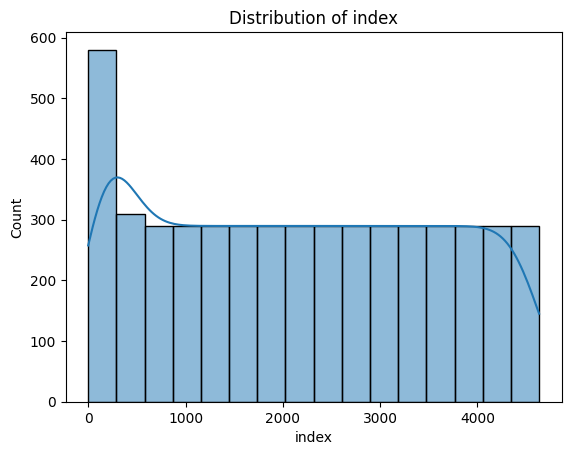

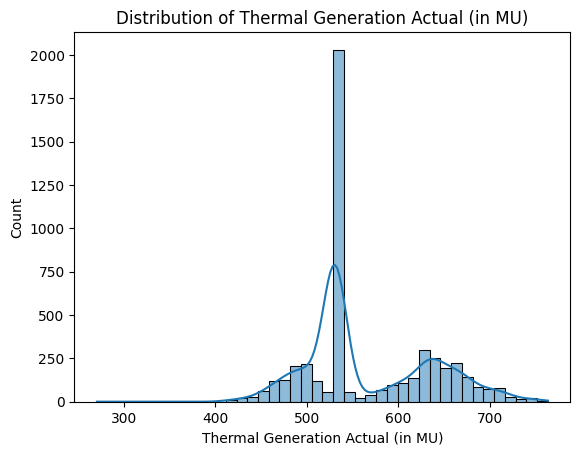

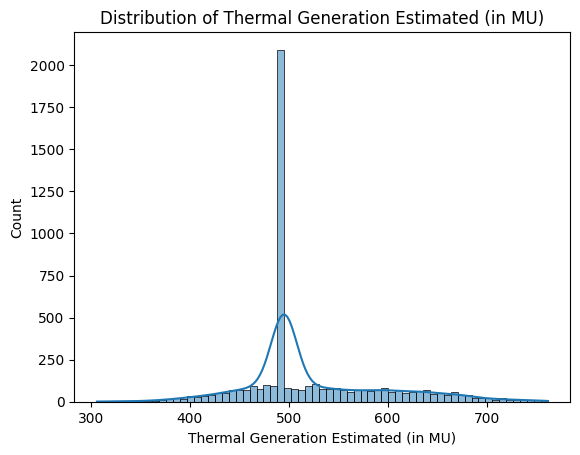

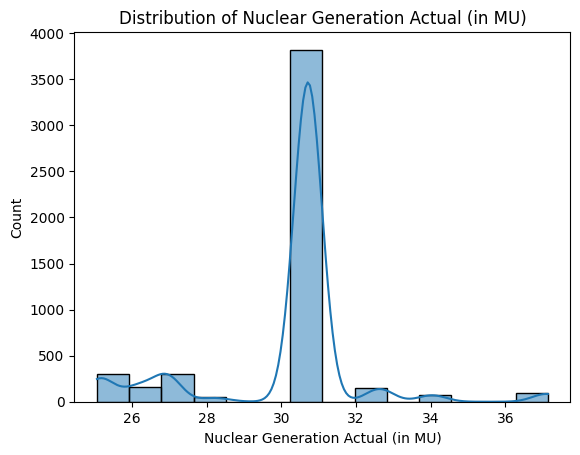

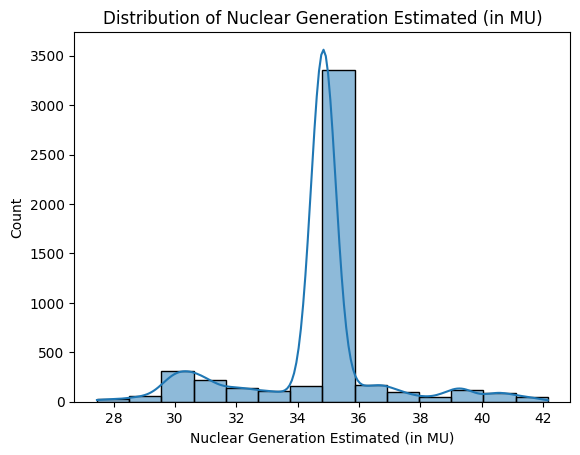

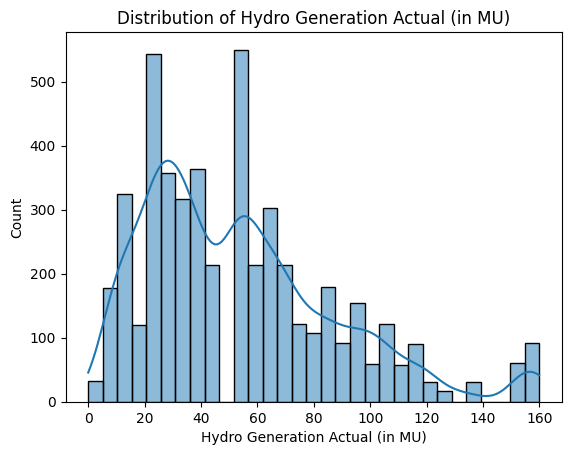

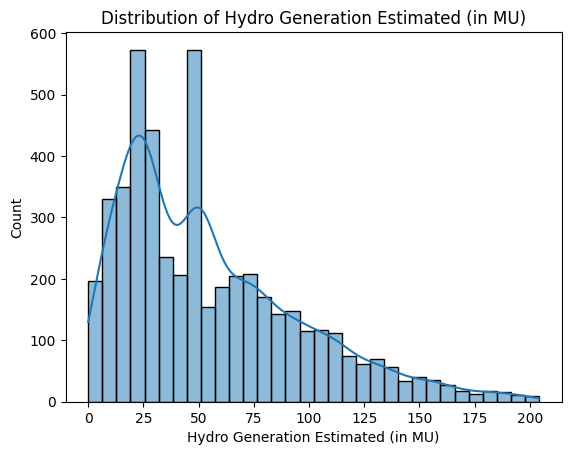

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    sns.histplot(power_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [25]:
power_df = pd.get_dummies(power_df, columns=["Region"], drop_first=True)

In [26]:
power_df.head()

,index,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Year,Month,DayOfWeek,Region_NorthEastern,Region_Northern,Region_Southern,Region_Western
0,0.0,624.23,484.21,30.36,35.57,52.96,50.27,2017,9,1,False,True,False,False
1,1.0,530.46,495.45,25.17,34.84,72.00,21.53,2017,9,1,False,False,False,True
2,2.0,576.66,578.55,30.72,34.84,111.57,64.78,2017,9,1,False,False,True,False
3,3.0,441.02,429.39,30.72,34.84,85.94,69.36,2017,9,1,False,False,False,False
4,4.0,530.46,495.45,30.72,34.84,24.64,21.21,2017,9,1,True,False,False,False


In [27]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   float64
 1   Thermal Generation Actual (in MU)     4945 non-null   float64
 2   Thermal Generation Estimated (in MU)  4945 non-null   float64
 3   Nuclear Generation Actual (in MU)     4945 non-null   float64
 4   Nuclear Generation Estimated (in MU)  4945 non-null   float64
 5   Hydro Generation Actual (in MU)       4945 non-null   float64
 6   Hydro Generation Estimated (in MU)    4945 non-null   float64
 7   Year                                  4945 non-null   int32  
 8   Month                                 4945 non-null   int32  
 9   DayOfWeek                             4945 non-null   int32  
 10  Region_NorthEastern                   4945 non-null   bool   
 11  Region_Northern  

In [28]:
power_df["Region_NorthEastern"]=power_df["Region_NorthEastern"].astype(int)
power_df["Region_Northern"]=power_df["Region_Northern"].astype(int)
power_df["Region_Southern"]=power_df["Region_Southern"].astype(int)
power_df["Region_Western"]=power_df["Region_Western"].astype(int)

In [29]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   float64
 1   Thermal Generation Actual (in MU)     4945 non-null   float64
 2   Thermal Generation Estimated (in MU)  4945 non-null   float64
 3   Nuclear Generation Actual (in MU)     4945 non-null   float64
 4   Nuclear Generation Estimated (in MU)  4945 non-null   float64
 5   Hydro Generation Actual (in MU)       4945 non-null   float64
 6   Hydro Generation Estimated (in MU)    4945 non-null   float64
 7   Year                                  4945 non-null   int32  
 8   Month                                 4945 non-null   int32  
 9   DayOfWeek                             4945 non-null   int32  
 10  Region_NorthEastern                   4945 non-null   int32  
 11  Region_Northern  

In [30]:
power_df.head()

,index,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Year,Month,DayOfWeek,Region_NorthEastern,Region_Northern,Region_Southern,Region_Western
0,0.0,624.23,484.21,30.36,35.57,52.96,50.27,2017,9,1,0,1,0,0
1,1.0,530.46,495.45,25.17,34.84,72.00,21.53,2017,9,1,0,0,0,1
2,2.0,576.66,578.55,30.72,34.84,111.57,64.78,2017,9,1,0,0,1,0
3,3.0,441.02,429.39,30.72,34.84,85.94,69.36,2017,9,1,0,0,0,0
4,4.0,530.46,495.45,30.72,34.84,24.64,21.21,2017,9,1,1,0,0,0


In [158]:
X = power_df[[
    "Year", "Month", "DayOfWeek",
    "Thermal Generation Estimated (in MU)",
    "Nuclear Generation Estimated (in MU)",
    "Hydro Generation Estimated (in MU)"
] + [col for col in power_df.columns if col.startswith("Region_")]]

In [159]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)


In [160]:
y = power_df[[
    "Thermal Generation Actual (in MU)",
    "Nuclear Generation Actual (in MU)",
    "Hydro Generation Actual (in MU)"
]]

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [162]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(RandomForestRegressor( n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=15,
                                                     max_features='sqrt',
                                                     min_samples_leaf=3,
                                                     min_samples_split=5,
                                                     n_estimators=300,
                                                     random_state=42))

In [163]:
y_pred = model.predict(X_test)

In [164]:
y_test

,Thermal Generation Actual (in MU),Nuclear Generation Actual (in MU),Hydro Generation Actual (in MU)
151,530.46,25.13,57.11
807,643.74,30.72,82.80
621,530.46,25.19,41.22
3976,530.46,30.72,36.40
3996,530.46,30.72,36.40
...,...,...,...
4856,530.46,30.72,29.75
1052,649.52,30.72,88.22
4926,530.46,30.72,29.75
4058,478.05,30.72,37.92


In [165]:
y_pred

array([[530.29066368,  25.32834265,  54.42282043],
       [642.99618313,  30.72      ,  75.02884815],
       [530.00693453,  25.54889117,  40.17620256],
       ...,
       [530.47686716,  30.99318313,  29.79655392],
       [480.46474628,  30.72      ,  33.82200736],
       [589.02780405,  30.36333468,  81.25191067]])

In [166]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2.8487799397780535
R2 Score: 0.9504683382602933


In [168]:
import joblib

joblib.dump(model, "model_kdk.pkl")
joblib.dump(X.columns, "x_columns_kdk.pkl")

['x_columns_kdk.pkl']

# Data pass to model

In [50]:
future_dates = pd.date_range(start="2025-10-01", periods=30, freq="D")

In [51]:
future_df = pd.DataFrame({
    "Date": future_dates,   
    "Year": future_dates.year,
    "Month": future_dates.month,
    "DayOfWeek": future_dates.dayofweek,
    "Region": "North" 
})

In [52]:
future_df["Thermal Generation Estimated (in MU)"] = 500 
future_df["Nuclear Generation Estimated (in MU)"] = 200
future_df["Hydro Generation Estimated (in MU)"] = 300


In [53]:
future_encoded = pd.get_dummies(future_df.drop(columns=["Date"]), columns=["Region"], drop_first=True)


In [54]:
future_encoded = future_encoded.reindex(columns=X.columns, fill_value=0)


In [55]:
future_preds = model.predict(future_encoded)


In [56]:
preds_df = pd.DataFrame(future_preds, columns=[
    "Thermal_Actual_Pred",
    "Nuclear_Actual_Pred",
    "Hydro_Actual_Pred"
])

In [57]:
results = pd.concat([future_df[["Date"]], preds_df], axis=1)


In [58]:

print(results.head(10))

        Date  Thermal_Actual_Pred  Nuclear_Actual_Pred  Hydro_Actual_Pred
0 2025-10-01             494.9710                30.72            69.9766
1 2025-10-02             496.9508                30.72            69.9766
2 2025-10-03             496.9508                30.72            70.5160
3 2025-10-04             497.3685                30.72            70.5160
4 2025-10-05             498.8722                30.72            70.5160
5 2025-10-06             494.9710                30.72            69.9766
6 2025-10-07             494.9710                30.72            69.9766
7 2025-10-08             494.9710                30.72            69.9766
8 2025-10-09             496.9508                30.72            69.9766
9 2025-10-10             496.9508                30.72            70.5160
